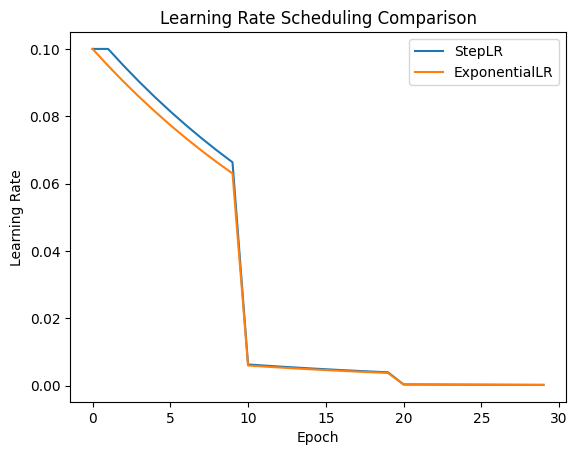

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

model = nn.Sequential(nn.Linear(10, 20), nn.ReLU(), nn.Linear(20, 1))
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


step_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
exp_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

lrs_step, lrs_exp = [], []

for epoch in range(30):

    optimizer.step()

    lrs_step.append(step_scheduler.get_last_lr()[0])
    lrs_exp.append(exp_scheduler.get_last_lr()[0])

    step_scheduler.step()
    exp_scheduler.step()

plt.plot(lrs_step, label="StepLR")
plt.plot(lrs_exp, label="ExponentialLR")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Scheduling Comparison")
plt.legend()
plt.show()

In [ ]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,    
    patience=2
)

val_losses = [0.5, 0.45, 0.46, 0.46, 0.43, 0.43]

for epoch, val_loss in enumerate(val_losses):
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}: LR = {optimizer.param_groups[0]['lr']:.5f}")

Epoch 1: LR = 0.00002
Epoch 2: LR = 0.00002
Epoch 3: LR = 0.00002
Epoch 4: LR = 0.00002
Epoch 5: LR = 0.00002
Epoch 6: LR = 0.00002


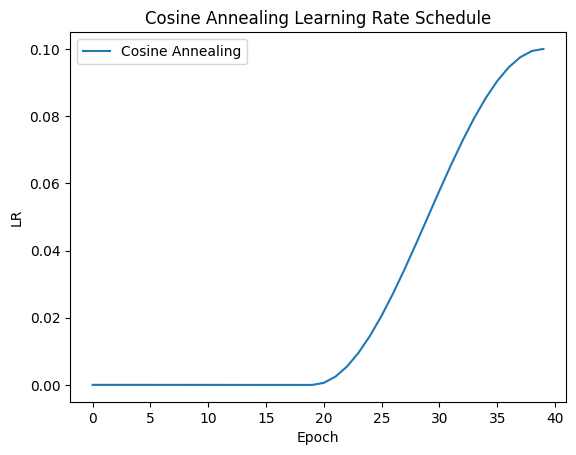

In [ ]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)
lrs_cosine = []

for epoch in range(40):
    scheduler.step()
    lrs_cosine.append(scheduler.get_last_lr()[0])

plt.plot(lrs_cosine, label="Cosine Annealing")
plt.title("Cosine Annealing Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("LR")
plt.legend()
plt.show()